# Submission for Individual Assignment
**NAME:** Lim Wen Mi

**UOW ID:** 7894363

**TASK:** 1 (KNN)

# Initial setup

## Import libraries

In [ ]:
# Required modules for KNN
from sklearn.neighbors import KNeighborsClassifier

# Common machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    ConfusionMatrixDisplay

# Import other required modules
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tqdm import tqdm
from google.colab import drive  # For link with google drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the base path to the flowers directory in Google Drive
DRIVE_PATH = '/content/drive/MyDrive/Colab Notebooks/CSCI218/Individual Assignment/flowers'
LABELS = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'] # Set sub-folders contain in "flowers"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Common RGB values for pure colors:

* Red: [255, 0, 0] (maximum red, no green or blue).
* Green: [0, 255, 0] (maximum green, no red or blue).
* Blue: [0, 0, 255] (maximum blue, no red or green).
* Yellow: [255, 255, 0] (maximum red and green, no blue).
* White: [255, 255, 255] (maximum intensity for all colors).
* Black: [0, 0, 0] (no intensity for any color).

# Pre-processing functions

In [ ]:
hist_size = 6

def preprocess_image(path_to_image, img_size=150):
    # Read and resize an input image
    img = cv2.imread(path_to_image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_size, img_size))
    return np.array(img)

def extract_color_histogram(dataset, hist_size=hist_size):
    # Extract colour histogram features from a dataset of images (joint distribution of pixel intensities)
    col_hist = []
    for img in dataset:
        hist = cv2.calcHist([img], [0, 1, 2], None, (hist_size, hist_size, hist_size), [0, 256, 0, 256, 0, 256])
        col_hist.append(cv2.normalize(hist, None, 0, 1, cv2.NORM_MINMAX).flatten())
    return np.array(col_hist)

def load_dataset(base_path=DRIVE_PATH):
    # Load images from the dataset
    X = []
    Y = []
    for i in range(0, len(LABELS)):
        current_size = len(X)
        for img in tqdm(os.listdir(base_path + os.sep + LABELS[i])):
            X.append(preprocess_image(base_path + os.sep + LABELS[i] + '/' + img))
            Y.append(LABELS[i])
        print(f'Loaded {len(X) - current_size} {LABELS[i]} images')
    return X, Y

def display_random_samples(X, y, samples_per_class=3):
    # Display random sample images from each class
    plt.figure(figsize=(15, 10))
    plt.suptitle('Random Samples from Each Flower Type', fontsize=16)

    for i, label in enumerate(LABELS):
        indices = [idx for idx, class_label in enumerate(y) if class_label == label]
        sample_indices = np.random.choice(indices, samples_per_class, replace=False)

        for j, idx in enumerate(sample_indices):
            plt.subplot(len(LABELS), samples_per_class, i*samples_per_class + j + 1)
            plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
            plt.title(f'{label}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

def display_color_histograms(X, y, samples=3):
    # Display color histograms for sample images
    sample_indices = np.random.choice(len(X), samples, replace=False)

    for idx in sample_indices:
        img = X[idx]
        label = y[idx]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(f'Color Distribution for {label}', fontsize=16)

        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image')
        ax1.axis('off')

        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            ax2.plot(hist, color=color, label=f'{color.upper()} Channel')

        ax2.set_title('Color Histogram')
        ax2.set_xlabel('Pixel Value')
        ax2.set_ylabel('Frequency')
        ax2.legend()
        plt.tight_layout()
        plt.show()

def display_histogram_example(X, y, sample_index=0, hist_size=hist_size):
    # Display a detailed example of color histogram extraction
    img = X[sample_index]
    label = y[sample_index]

    hist = cv2.calcHist([img], [0, 1, 2], None, (hist_size, hist_size, hist_size), [0, 256, 0, 256, 0, 256])
    normalized_hist = cv2.normalize(hist, None, 0, 1, cv2.NORM_MINMAX).flatten()

    plt.figure(figsize=(15, 5))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Color Histogram Analysis for {label}', fontsize=16)

    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax1.axis('off')

    non_zero_bins = normalized_hist[normalized_hist > 0]
    ax2.bar(range(len(non_zero_bins)), non_zero_bins)
    ax2.set_title(f'Non-zero bins in flattened histogram\nTotal bins: {len(normalized_hist)}, Non-zero bins: {len(non_zero_bins)}')
    ax2.set_xlabel('Bin Index')
    ax2.set_ylabel('Normalized Count')

    plt.tight_layout()
    plt.show()

    print(f"\nHistogram shape: {hist.shape}")
    print(f"Flattened histogram shape: {normalized_hist.shape}")
    print("\nSample of non-zero bin values:")
    for i, val in enumerate(non_zero_bins[:7]): # set bin to 6 with 7 edges
        print(f"Bin {i}: {val:.4f}")

# Main

Loading dataset...


100%|██████████| 764/764 [00:31<00:00, 24.02it/s]


Loaded 764 daisy images


100%|██████████| 1052/1052 [00:40<00:00, 25.88it/s]


Loaded 1052 dandelion images


100%|██████████| 784/784 [00:37<00:00, 21.04it/s] 


Loaded 784 rose images


100%|██████████| 733/733 [00:29<00:00, 24.70it/s] 


Loaded 733 sunflower images


100%|██████████| 984/984 [00:24<00:00, 40.11it/s] 


Loaded 984 tulip images
Dataset loaded: 4317 images

Displaying random samples from each flower type...


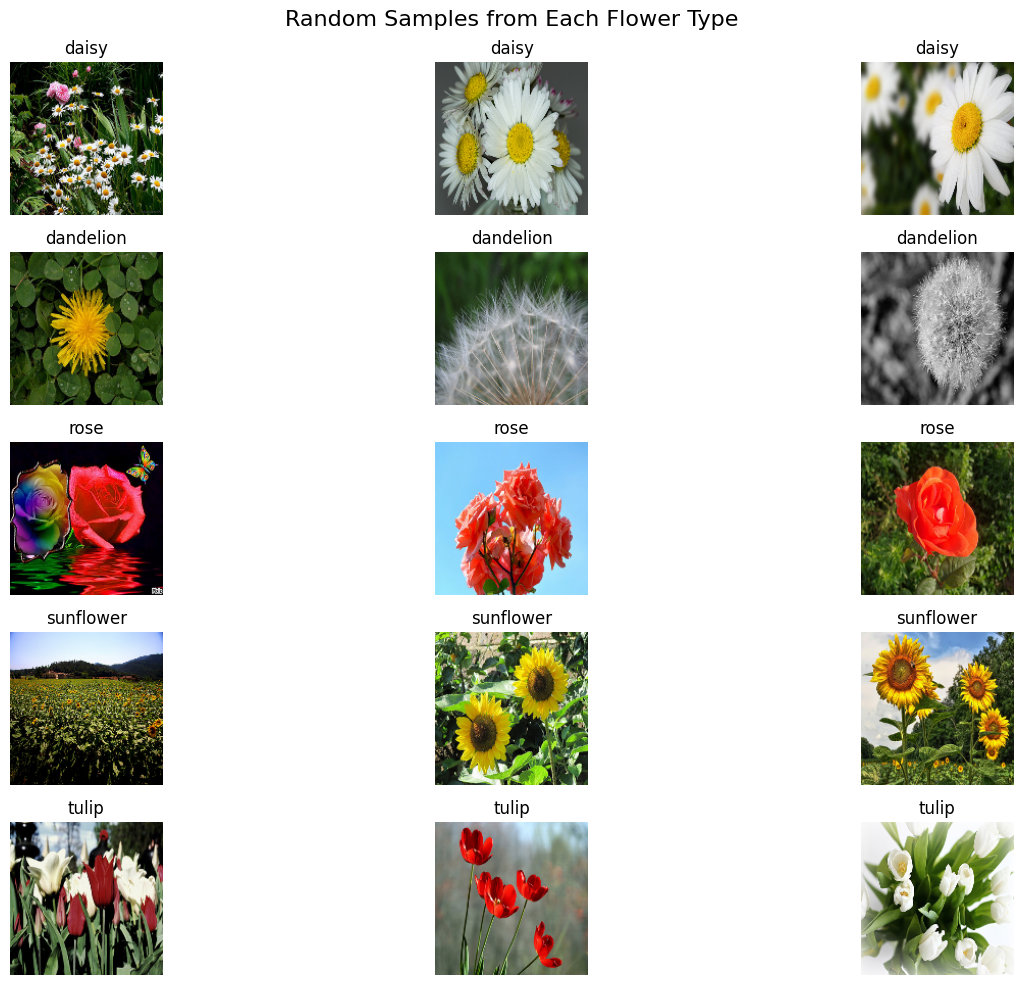


Displaying color histograms for random samples...


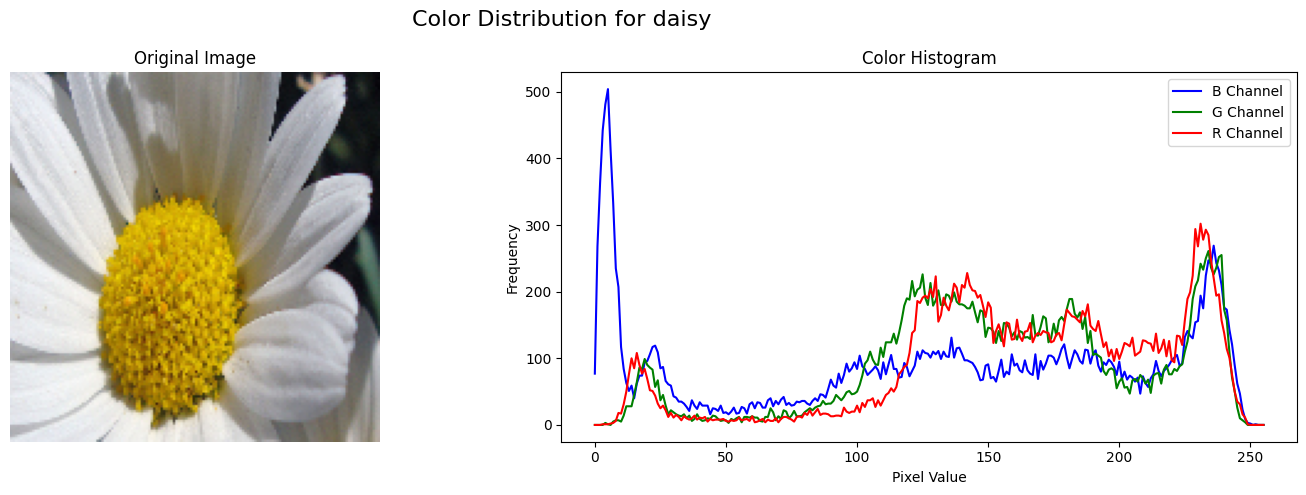

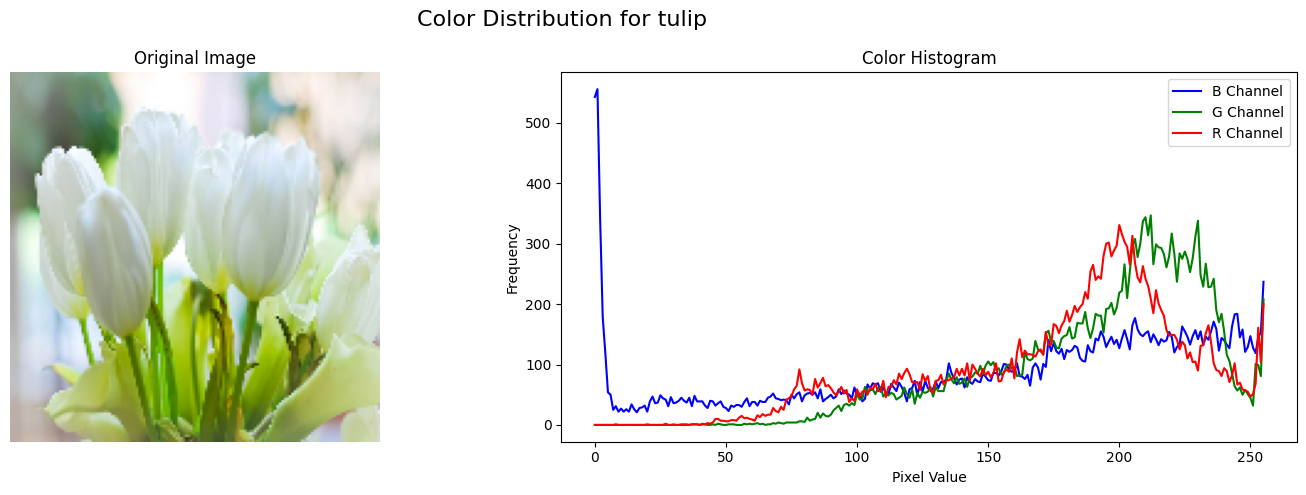

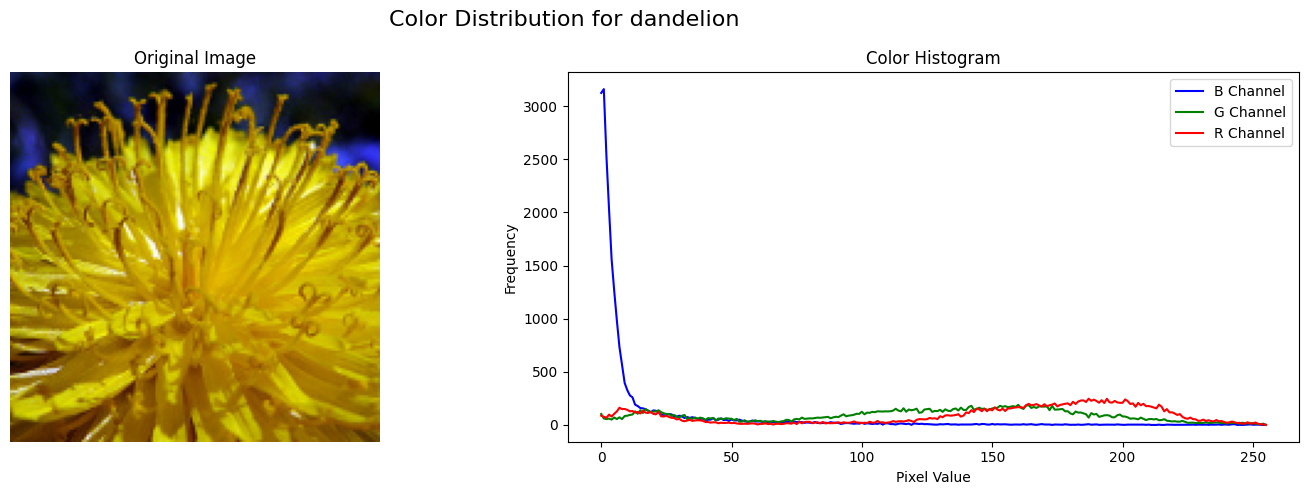


Displaying detailed histogram example...


<Figure size 1500x500 with 0 Axes>

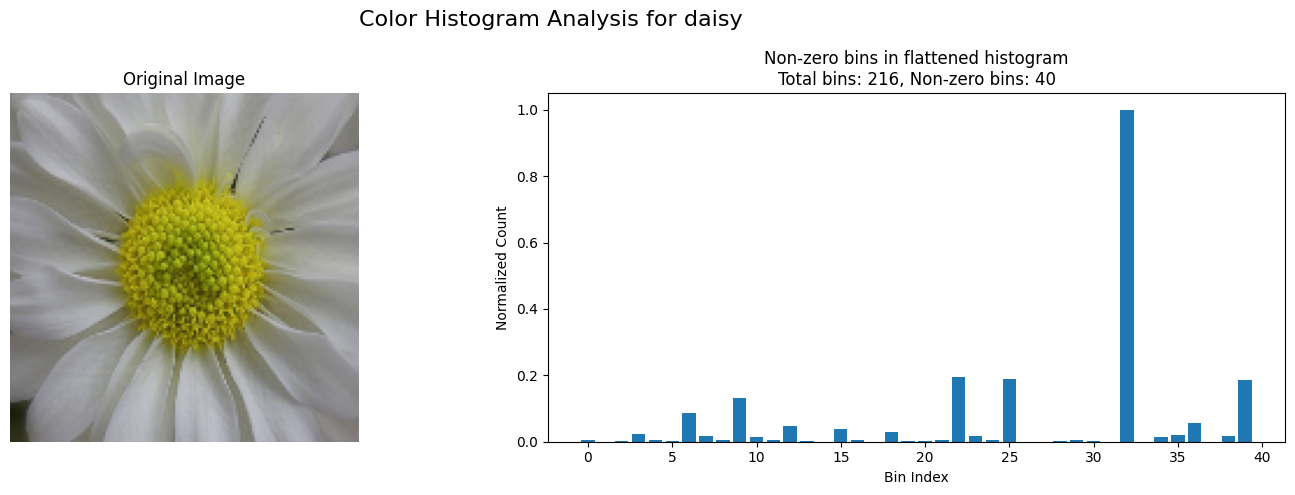


Histogram shape: (6, 6, 6)
Flattened histogram shape: (216,)

Sample of non-zero bin values:
Bin 0: 0.0051
Bin 1: 0.0001
Bin 2: 0.0011
Bin 3: 0.0218
Bin 4: 0.0053
Bin 5: 0.0015
Bin 6: 0.0855

Train set: 2590 images
Validation set: 863 images
Test set: 864 images
Extracting color histogram features...
Shape of X_train_hist: (2590, 216)
Finding optimal k value...
k=1: validation accuracy = 0.4206
k=3: validation accuracy = 0.4067
k=5: validation accuracy = 0.4137
k=7: validation accuracy = 0.4311
k=9: validation accuracy = 0.4357
k=11: validation accuracy = 0.4461
k=13: validation accuracy = 0.4415
k=15: validation accuracy = 0.4577
k=17: validation accuracy = 0.4589
k=19: validation accuracy = 0.4496
k=21: validation accuracy = 0.4368
k=23: validation accuracy = 0.4415
k=25: validation accuracy = 0.4368
k=27: validation accuracy = 0.4345
k=29: validation accuracy = 0.4345
k=31: validation accuracy = 0.4345
k=33: validation accuracy = 0.4392
k=35: validation accuracy = 0.4276
k=37: vali

<Figure size 1000x1000 with 0 Axes>

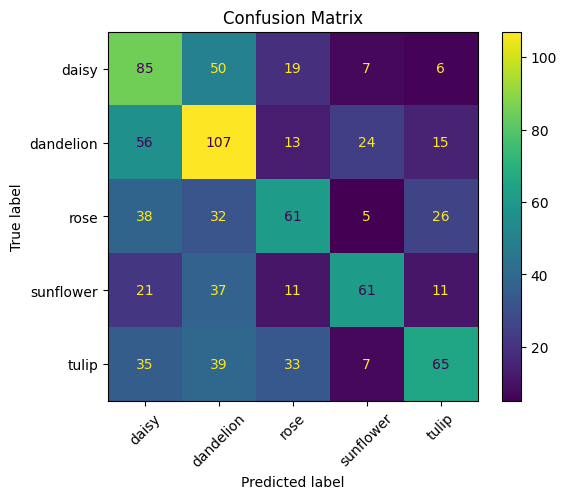

In [ ]:
if __name__ == '__main__':
    # STEP 1. Load dataset
    print("Loading dataset...")
    X, y = load_dataset(DRIVE_PATH)
    X = np.array(X)

    print(f"Dataset loaded: {X.shape[0]} images")


    # Display random samples from each class
    print("\nDisplaying random samples from each flower type...")
    display_random_samples(X,y)

    # Display color histograms for a few random samples
    print("\nDisplaying color histograms for random samples...")
    display_color_histograms(X,y)

    # Display detailed histogram example
    print("\nDisplaying detailed histogram example...")
    display_histogram_example(X,y)

    # STEP 2. Split dataset into train, validation, and test
    # Set the split to achieve 60% train, 20% validation and 20% test
    # Split 60% for training & 40% for validation + test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    # Split validation + test with 0.5, hence 40/2 => 20% for test & 20% for validation
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"\nTrain set: {len(X_train)} images")
    print(f"Validation set: {len(X_val)} images")
    print(f"Test set: {len(X_test)} images")

    # STEP 3. Extract colour histogram features from the datasets
    print("Extracting color histogram features...")
    X_train_hist = extract_color_histogram(X_train)
    print(f"Shape of X_train_hist: {X_train_hist.shape}")
    X_val_hist = extract_color_histogram(X_val)
    X_test_hist = extract_color_histogram(X_test)

    # STEP 4. Determine the optimal values of k with odd numbers set (from 1 - 100)
    k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
    val_accuracies = []

    print("Finding optimal k value...")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_hist, y_train)
        val_pred = knn.predict(X_val_hist)
        val_acc = accuracy_score(y_val, val_pred)
        val_accuracies.append(val_acc)
        print(f"k={k}: validation accuracy = {val_acc:.4f}")

    optimal_k = k_values[np.argmax(val_accuracies)]
    print(f"\nOptimal k value: {optimal_k}")

    # STEP 5. Train a k-NN classifier with the optimal k
    print(f"\nTraining final model with k={optimal_k}...")
    final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
    start_time = timer()
    final_knn.fit(X_train_hist, y_train)
    train_time = timer() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    # STEP 6. Evaluate the k-NN on the test dataset
    print("\nEvaluating on test set...")
    start_time = timer()
    y_pred = final_knn.predict(X_test_hist)
    test_time = timer() - start_time

    # STEP 7. Report the classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("\nClassification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Average prediction time per image: {(test_time/len(X_test)):.4f} seconds")

    # STEP 8. Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=LABELS)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
    plt.figure(figsize=(10, 10))
    disp.plot(xticks_rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

# Analyzation

In [ ]:
def display_knn_classified_images(X_train, y_train, X_test, y_test, k=5, correct=True, num_images=5, hist_size=hist_size):
    """
    Displays correctly or incorrectly classified images using k-NN.
    """
    # Train k-NN classifier on color histogram features
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train_hist = extract_color_histogram(X_train, hist_size)
    X_test_hist = extract_color_histogram(X_test, hist_size)
    knn.fit(X_train_hist, y_train)

    # Predict test labels
    y_pred = knn.predict(X_test_hist)

    # Find indices of correct or incorrect predictions
    indices = [i for i in range(len(y_test)) if (y_test[i] == y_pred[i]) == correct]
    if len(indices) < num_images:
        num_images = len(indices)

    sample_indices = np.random.choice(indices, num_images, replace=False)

    # Plot images
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(X_test[idx], cv2.COLOR_BGR2RGB))
        title = f"Pred: {y_pred[idx]}\nActual: {y_test[idx]}"
        plt.title(title, fontsize=10)
        plt.axis("off")
    plt.show()


## Display correctly/incorrectly classified images


Showing correctly classified images:


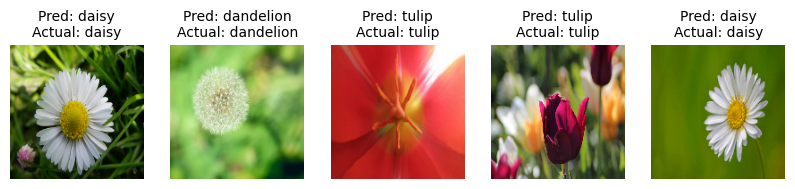


Showing incorrectly classified images:


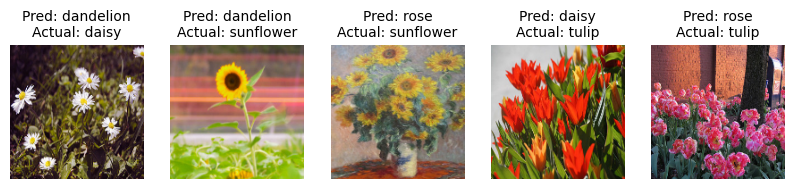


Analysis of Common Misclassifications:
dandelion mistaken for daisy: 56 times
daisy mistaken for dandelion: 50 times
tulip mistaken for dandelion: 39 times
rose mistaken for daisy: 38 times
sunflower mistaken for dandelion: 37 times


In [ ]:
# Show correctly classified images
print("\nShowing correctly classified images:")
display_knn_classified_images(X_train, y_train, X_test, y_test, k=optimal_k, correct=True, num_images=5)

# Show incorrectly classified images
print("\nShowing incorrectly classified images:")
display_knn_classified_images(X_train, y_train, X_test, y_test, k=optimal_k, correct=False, num_images=5)

# Analysis clasification
print("\nAnalysis of Common Misclassifications:")
incorrect = np.where(y_pred != y_test)[0]  # Find indices of misclassified examples
confusion_pairs = [(y_test[i], y_pred[i]) for i in incorrect]  # Extract true and predicted labels for misclassified samples

# Count occurrences of each misclassification pair
common_confusions = {}
for true, pred in confusion_pairs:
    pair = (true, pred)
    common_confusions[pair] = common_confusions.get(pair, 0) + 1

# Sort and print the top 5 most common misclassifications
sorted_confusions = sorted(common_confusions.items(), key=lambda x: x[1], reverse=True)
for (true, pred), count in sorted_confusions[:5]:
    print(f"{true} mistaken for {pred}: {count} times")